In [1]:
import os 
import glob
from pathlib import Path
import pandas as pd 
import numpy as np 

In [2]:
gbm_patients = os.listdir('/working/lupolab/julia/tcia_analysis/datasets/TCGA-GBM-nifti')

In [3]:
lgg_patients = os.listdir('/working/lupolab/julia/tcia_analysis/datasets/TCGA-LGG-nifti')

## We need to map the segmentations that are seemingly randomly named from one of the T1, T2, T2-FLAIR or T1C nifti images that were fed to the algorithm

In [4]:
series_folders_with_segs = os.listdir('/working/lupolab/julia/tcia_analysis/segmentation_mri_brain_tumors_br16_full_v1/eval_strip')

In [10]:
patient = gbm_patients[0]

In [6]:
root_dir = "/working/lupolab/julia/tcia_analysis/datasets/TCGA-GBM-nifti"

In [7]:
# [x.split('/')[-1] for x in glob.glob(root_dir+"/"+patient+"/*/*")]

In [11]:
glob.glob(root_dir+"/"+patient+"/*/*")

['/working/lupolab/julia/tcia_analysis/datasets/TCGA-GBM-nifti/TCGA-06-0210/08-17-1995-19584/1-SAG_LOCAL-29333.nii.gz',
 '/working/lupolab/julia/tcia_analysis/datasets/TCGA-GBM-nifti/TCGA-06-0210/08-17-1995-19584/3-AXIAL_T1-88865.nii.gz',
 '/working/lupolab/julia/tcia_analysis/datasets/TCGA-GBM-nifti/TCGA-06-0210/08-17-1995-19584/2-AXIAL_T2-83081.nii.gz',
 '/working/lupolab/julia/tcia_analysis/datasets/TCGA-GBM-nifti/TCGA-06-0210/08-17-1995-19584/4-AXIAL_T1_POST_GD-64939.nii.gz']

In [12]:
gbm_patientID_to_seriesID = {}
for patient in gbm_patients: 
    gbm_patientID_to_seriesID[patient] = [x.split('/')[-1].split('.')[0:-2][0] for x in glob.glob(root_dir+"/"+patient+"/*/*")]

In [14]:
root_dir = "/working/lupolab/julia/tcia_analysis/datasets/TCGA-LGG-nifti"

In [15]:
lgg_patientID_to_seriesID = {}
for patient in lgg_patients: 
    lgg_patientID_to_seriesID[patient] = [x.split('/')[-1].split('.')[0:-2][0] for x in glob.glob(root_dir+"/"+patient+"/*/*")]

In [44]:
# gbm_patientID_to_seriesID

In [17]:
mapping_dict = {}

In [18]:
for idx, i in enumerate(series_folders_with_segs): 
    for key, value in gbm_patientID_to_seriesID.items(): 
        if i in value: 
#             print(idx, i, key)
            mapping_dict[i] = key

In [19]:
for idx, i in enumerate(series_folders_with_segs): 
    for key, value in lgg_patientID_to_seriesID.items(): 
        if i in value: 
#             print(idx, i, key)
            mapping_dict[i] = key

In [20]:
mapping_dict

{'10-AX_T1_POST_GD_FLAIR-95256a_n': 'TCGA-06-0241',
 '9-AX_T1_POST_GD_FLAIR-32350a_n': 'TCGA-06-0171',
 '15-Ax_SE_T1_Post-42502a_n': 'TCGA-02-0087',
 '6-AX_T1_POST-52648a_n': 'TCGA-02-0116',
 '11-AX_T1_POST_GD_FLAIR-15818a_n': 'TCGA-06-2570',
 '6-AX_T1_POST-64479a_n': 'TCGA-02-0037',
 '8-Ax_T1_2': 'TCGA-DU-5851',
 '8-AXIAL_T1_GD-71120a_n': 'TCGA-06-0127',
 '10-AX_T1_POST_GD_FLAIR-80095a_n': 'TCGA-06-0881',
 '13-AxT1-thin_for_surgery-12089a_n': 'TCGA-06-0182',
 '6-3D_SPGR_AX-79240a_n': 'TCGA-08-0521',
 '12-AX_T1_POST_GD_FLAIR-37089a_n': 'TCGA-06-0138',
 '10-3d_T1_FSPGR__CONT-32567a_n': 'TCGA-08-0389',
 '801-brain_with_AX_T1_POST-26488a_n': 'TCGA-14-1395',
 '901-BRAIN_WWO_T1_POST-50983a_n': 'TCGA-14-0813',
 '10-AX_T1_POST_GD_FLAIR-65253a_n': 'TCGA-06-0644',
 '12-AX_T1_POST_GD_FLAIR-61610a_n': 'TCGA-06-1802',
 '2-Ax_T1_SE-18545a_n': 'TCGA-14-1459',
 '2-ax_t1_c-85616a_n': 'TCGA-12-1093',
 '9-AxT1-thin_for_surgery-27598a_n': 'TCGA-06-0240',
 '9-AXIAL_T1_GD-34814a_n': 'TCGA-06-0176',
 '12-Ax

In [21]:
len(mapping_dict.keys())

194

In [64]:
with open('segmentation_mapping.json', 'w') as fp:
    json.dump(mapping_dict, fp)

## Now just quickly visually spot checking a few of the segmentations to see if they are correct: 

In [22]:
## Let's investigate just a few of them to ensure that they are correct: 
import nibabel as nib
import matplotlib.pyplot as plt

/data/svcf/software/anaconda3/envs/fastai/lib/python3.7/site-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


In [23]:
import nilearn

In [24]:
from nilearn.plotting import plot_anat
%matplotlib inline

### TCGA-06-0241

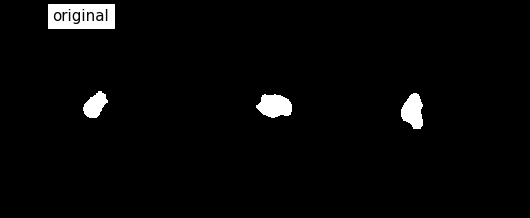

In [25]:
plot_anat('/working/lupolab/julia/tcia_analysis/segmentation_mri_brain_tumors_br16_full_v1/eval_strip/10-AX_T1_POST_GD_FLAIR-95256a_n/10-AX_T1_POST_GD_FLAIR-95256a_n_WT.nii.gz', title='original',
          display_mode='ortho', dim=-1, draw_cross=False, annotate=False);

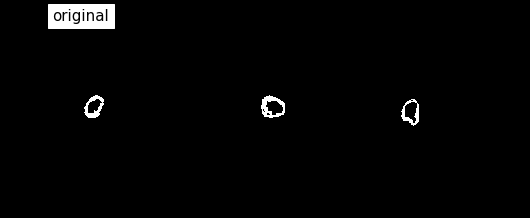

In [27]:
plot_anat('/working/lupolab/julia/tcia_analysis/segmentation_mri_brain_tumors_br16_full_v1/eval_strip/10-AX_T1_POST_GD_FLAIR-95256a_n/10-AX_T1_POST_GD_FLAIR-95256a_n_ET.nii.gz', title='original',
          display_mode='ortho', dim=-1, draw_cross=False, annotate=False);

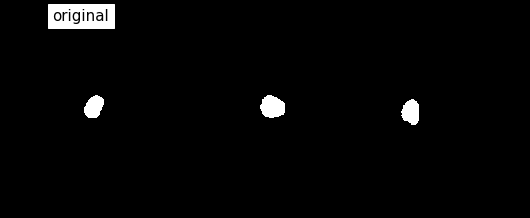

In [28]:
plot_anat('/working/lupolab/julia/tcia_analysis/segmentation_mri_brain_tumors_br16_full_v1/eval_strip/10-AX_T1_POST_GD_FLAIR-95256a_n/10-AX_T1_POST_GD_FLAIR-95256a_n_TC.nii.gz', title='original',
          display_mode='ortho', dim=-1, draw_cross=False, annotate=False);

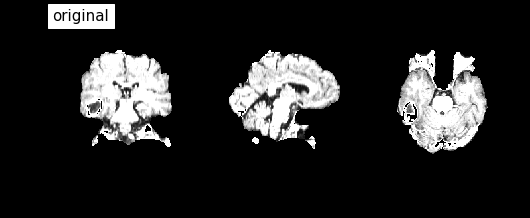

In [26]:
plot_anat('/working/lupolab/julia/tcia_analysis/datasets/TCGA-GBM-nifti/TCGA-06-0241/08-30-2005-93299/10-AX_T1_POST_GD_FLAIR-95256a_n.nii.gz', title='original',
          display_mode='ortho', dim=-1, draw_cross=False, annotate=False);

In [29]:
seg_WT_DU_A5TS = nib.load('/working/lupolab/julia/tcia_analysis/segmentation_mri_brain_tumors_br16_full_v1/eval_strip/11-AX_T1_POST_GD_FLAIR-81300a_n/11-AX_T1_POST_GD_FLAIR-81300a_n_WT.nii.gz')

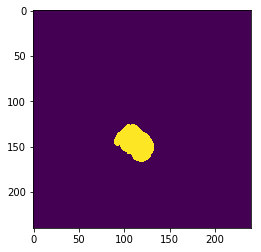

In [30]:
plt.imshow(seg_WT_DU_A5TS.dataobj[:,:,140])

In [31]:
seg_ET_DU_A5TS = nib.load('/working/lupolab/julia/tcia_analysis/segmentation_mri_brain_tumors_br16_full_v1/eval_strip/11-AX_T1_POST_GD_FLAIR-81300a_n/11-AX_T1_POST_GD_FLAIR-81300a_n_ET.nii.gz')

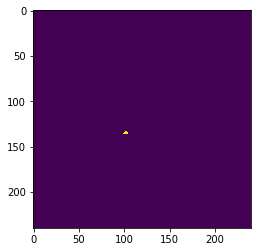

In [32]:
plt.imshow(seg_ET_DU_A5TS.dataobj[:,:,140])

### TCGA-76-6664

Chosen Randomly, maps to `1401-T1_SAG_POST-07378a`


In [33]:
import json

In [34]:
## Read in datalist json

with open('/working/lupolab/julia/tcia_analysis/segmentation_mri_brain_tumors_br16_full_v1/config/config_datalist_stripped.json') as json_file:
    datalist = json.load(json_file)
    

In [35]:
datalist

{'validation': [{'label': '',
   'image': ['TCGA-LGG-nifti/TCGA-DU-5853/08-23-1995-MRI_BRAIN_WWO_CONTRAST-78436/11-AX_T1_POST_GD_FLAIR-81300a_n.nii.gz',
    'TCGA-LGG-nifti/TCGA-DU-5853/08-23-1995-MRI_BRAIN_WWO_CONTRAST-78436/8-AX_T1_pre_gd-14019a_n.nii.gz',
    'TCGA-LGG-nifti/TCGA-DU-5853/08-23-1995-MRI_BRAIN_WWO_CONTRAST-78436/7-AX_T2_FR-FSE_RF2_150-55295a_n.nii.gz',
    'TCGA-LGG-nifti/TCGA-DU-5853/08-23-1995-MRI_BRAIN_WWO_CONTRAST-78436/6-AXIAL_FLAIR-84159a_n.nii.gz']},
  {'label': '',
   'image': ['TCGA-LGG-nifti/TCGA-CS-6186/06-01-2000-MRI_BRAIN_per_R-97608/1001-T1_SE_POST-94212a_n.nii.gz',
    'TCGA-LGG-nifti/TCGA-CS-6186/06-01-2000-MRI_BRAIN_per_R-97608/301-T1_SAG_SE-41348a_n.nii.gz',
    'TCGA-LGG-nifti/TCGA-CS-6186/06-01-2000-MRI_BRAIN_per_R-97608/501-T2-WHOLE_BRAIN-32557a_n.nii.gz',
    'TCGA-LGG-nifti/TCGA-CS-6186/06-01-2000-MRI_BRAIN_per_R-97608/401-T2_AX_FLAIR-72445a_n.nii.gz']},
  {'label': '',
   'image': ['TCGA-LGG-nifti/TCGA-FG-A6J1/04-23-2004-NR_MRI_BRAIN_WWO-08141/

In [36]:
t1ca_76_6664 = nib.load('/working/lupolab/julia/tcia_analysis/datasets/TCGA-GBM-nifti/TCGA-76-6664//01-10-2002-MRI_BRAIN_per_R-81790/1401-T1_SAG_POST-07378a_n.nii.gz')

In [37]:
fla_76_6664 = nib.load('/working/lupolab/julia/tcia_analysis/datasets/TCGA-GBM-nifti/TCGA-76-6664/01-10-2002-MRI_BRAIN_per_R-81790/601-T2_AX_FLAIR-75280a_n.nii.gz')

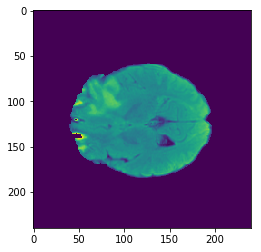

In [38]:
plt.imshow(fla_76_6664.dataobj[:,:,75])

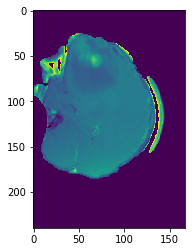

In [39]:
plt.imshow(t1ca_76_6664.dataobj[100,:,:])

In [40]:
## read in the segmentation of the whole tumor of this one: 
seg_WT_76_6664 = nib.load('/working/lupolab/julia/tcia_analysis/segmentation_mri_brain_tumors_br16_full_v1/eval_strip/1401-T1_SAG_POST-07378a_n/1401-T1_SAG_POST-07378a_n_WT.nii.gz')

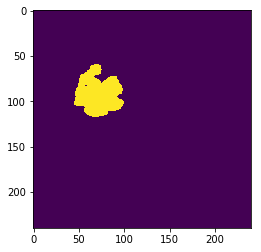

In [41]:
plt.imshow(seg_WT_76_6664.dataobj[:,:,75])

In [ ]:
plt.imshow(seg_WT_76_6664.dataobj[:,:,75])

In [42]:
## read in the segmentation of the whole tumor of this one: 
seg_ET_76_6664 = nib.load('/working/lupolab/julia/tcia_analysis/segmentation_mri_brain_tumors_br16_full_v1/eval_strip/1401-T1_SAG_POST-07378a_n/1401-T1_SAG_POST-07378a_n_ET.nii.gz')

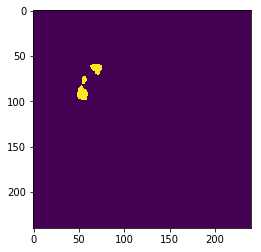

In [43]:
plt.imshow(seg_ET_76_6664.dataobj[:,:,75])

### TCGA-DU_5853

Chosen Randomly, maps to `11-AX_T1_POST_GD_FLAIR-81300a_n`


In [46]:
t1ca_DU_5853 = nib.load('/working/lupolab/julia/tcia_analysis/datasets/TCGA-LGG-nifti/TCGA-DU-5853/08-23-1995-MRI_BRAIN_WWO_CONTRAST-78436/11-AX_T1_POST_GD_FLAIR-81300a_n.nii.gz')

In [47]:
fla_DU_5853 = nib.load('/working/lupolab/julia/tcia_analysis/datasets/TCGA-LGG-nifti/TCGA-DU-5853/08-23-1995-MRI_BRAIN_WWO_CONTRAST-78436/6-AXIAL_FLAIR-84159a_n.nii.gz')

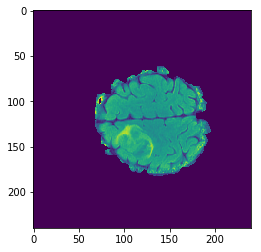

In [62]:
plt.imshow(fla_DU_5853.dataobj[:,:,140])

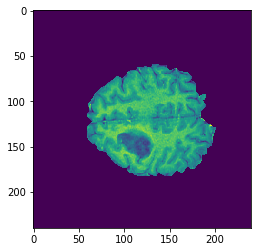

In [59]:
plt.imshow(t1ca_DU_5853.dataobj[:,:,130])

In [51]:
## read in the segmentation of the whole tumor of this one: 
seg_WT_DU_5853 = nib.load('/working/lupolab/julia/tcia_analysis/segmentation_mri_brain_tumors_br16_full_v1/eval_strip/11-AX_T1_POST_GD_FLAIR-81300a_n/11-AX_T1_POST_GD_FLAIR-81300a_n_WT.nii.gz')

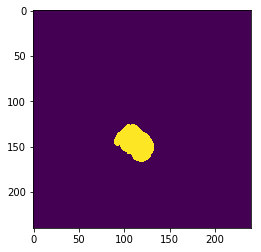

In [63]:
plt.imshow(seg_WT_DU_5853.dataobj[:,:,140])

In [ ]:
plt.imshow(seg_WT_DU_5853.dataobj[:,:,75])

In [42]:
## read in the segmentation of the whole tumor of this one: 
seg_ET_DU_5853 = nib.load('/working/lupolab/julia/tcia_analysis/segmentation_mri_brain_tumors_br16_full_v1/eval_strip/1401-T1_SAG_POST-07378a_n/1401-T1_SAG_POST-07378a_n_ET.nii.gz')

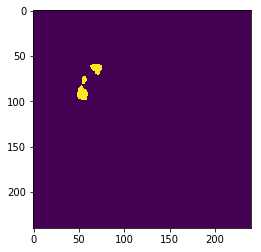

In [43]:
plt.imshow(seg_ET_DU_5853.dataobj[:,:,75])